# Appedix: Model for Real time use

**m.1 Import necessary libraries**

In [1]:
# Python program to read image using OpenCV 

# importing OpenCV(cv2) module 
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde
import matplotlib.image as mpimg
import scipy.misc
import glob 
import imageio
from cv2 import cvtColor
from moviepy.editor import VideoFileClip
from moviepy.editor import ImageSequenceClip
imageio.plugins.ffmpeg.download()

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)1654784/45929032 bytes (3.6%)5341184/45929032 bytes (11.6%)9093120/45929032 bytes (19.8%)12828672/45929032 bytes (27.9%)16285696/45929032 bytes (35.5%)20234240/45929032 bytes (44.1%)24117248/45929032 bytes (52.5%)27918336/45929032 bytes (60.8%)31768576/45929032 bytes (69.2%)35586048/45929032 bytes (77.5%)39288832/45929032 bytes (85.5%)42844160/45929032 bytes (93.3%)

**m.2 read and show testing image**

In [0]:
# Save image in set directory 
# Read RGB image 
img = cv2.imread('vlcsnap-2020-03-28-13h17m52s091.png', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

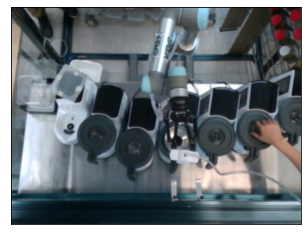

In [0]:
plt.imshow(img, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

**m.3 Define vector multiplication function to use the loading vectors**

In [0]:
def pca_img(img):

  length = np.size(img[:,0,0]) * np.size(img[0,:,0])
  unfolded = np.reshape(img, (length,3))
  unfolded_scaled = StandardScaler().fit_transform(unfolded)
  comp = [[ 0.57310752,  0.78805296], [ 0.58165606, -0.19797622], [ 0.57725557, -0.58290475]]
  t_scores = np.matmul(unfolded_scaled,comp)
  t_scores[:,0] = 255 * (t_scores[:,0] - t_scores[:,0].min())/(t_scores[:,0].max() - t_scores[:,0].min())  
  t_scores[:,1] = 255 * (t_scores[:,1] - t_scores[:,1].min())/(t_scores[:,1].max() - t_scores[:,1].min()) 
  t_scores = t_scores.astype(int)
  masked_image = np.zeros((np.size(img[:,0,0]),np.size(img[0,:,0]),3))
  masked_image[:,:,0] = np.reshape(t_scores[:,0],(np.size(img[:,0,0]), np.size(img[0,:,0])))
  masked_image[:,:,1] = np.reshape(t_scores[:,1],(np.size(img[:,0,0]), np.size(img[0,:,0])))
  masked_image[:,:,2] = np.reshape(t_scores[:,1],(np.size(img[:,0,0]), np.size(img[0,:,0])))

  masked_image = masked_image.astype(int)
  return masked_image

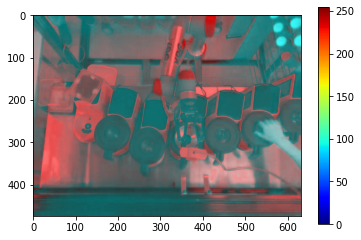

In [0]:
plt.imshow(pca_img(img), cmap="jet")
plt.colorbar()
plt.show()

**m.4 masking function**

In [0]:
def color_thresh(img, t_thresh_lower=(80, 162, 162),t_thresh_upper=(170, 210, 210)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > t_thresh_lower[0]) \
                & (img[:,:,1] > t_thresh_lower[1]) \
                & (img[:,:,2] > t_thresh_lower[2])\
                & (img[:,:,0] < t_thresh_upper[0]) \
                & (img[:,:,1] < t_thresh_upper[1]) \
                & (img[:,:,2] < t_thresh_upper[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select

**m.5 test on images with similar lighting and surroundings**

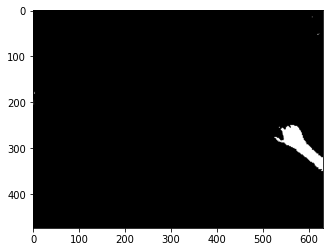

In [0]:
plt.imshow(color_thresh(pca_img(img)), cmap='gray')
plt.show()

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

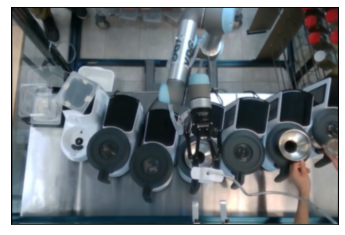

In [5]:
img5 = cv2.imread('snap1.PNG', 1)
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
plt.imshow(img5, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

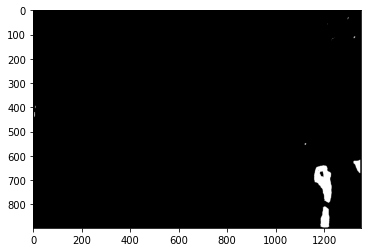

In [6]:
plt.imshow(color_thresh(pca_img(img5)), cmap='gray')
plt.show()

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

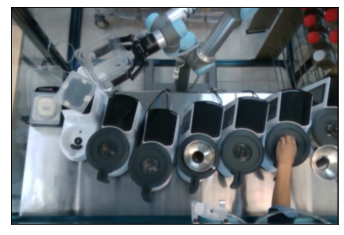

In [7]:
img6 = cv2.imread('snap2.PNG', 1)
img6 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)
plt.imshow(img6, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

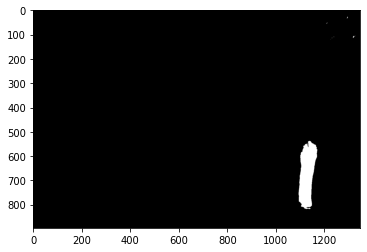

In [8]:
plt.imshow(color_thresh(pca_img(img6)), cmap='gray')
plt.show()

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

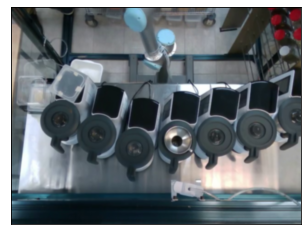

In [10]:
img7 = cv2.imread('vlcsnap-2020-03-28-13h17m13s718.png', 1)
img7 = cv2.cvtColor(img7, cv2.COLOR_BGR2RGB)
plt.imshow(img7, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

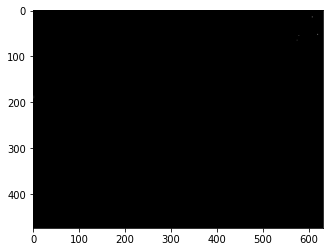

In [12]:
plt.imshow(color_thresh(pca_img(img7)), cmap='gray')
plt.show()

**m.6 test on image with warm lighting**

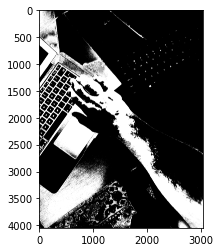

In [0]:
img4 = cv2.imread('IMG_20200413_233038.jpg', 1)
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
plt.imshow(color_thresh(pca_img(img4)), cmap='gray')
plt.show()

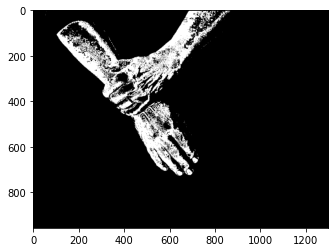

In [0]:
img5 = cv2.imread('hand_color.jpg', 1)
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
plt.imshow(color_thresh(pca_img(img5)), cmap='gray')
plt.show()